In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import cv2
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)
print(tf.config.list_physical_devices("GPU"))
print(device_lib.list_local_devices())

Python version: 3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.10.0
OpenCV version: 4.8.1
NumPy version: 1.26.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14305755246754765781
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2249719808
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17731552725287412874
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
# img_array = cv2.imread("Dataset/train/angry/Training_3908.jpg")

In [4]:
# img_array.shape

In [5]:
#print(img_array)

In [6]:
# plt.imshow(img_array)

In [7]:
img_size = 224
Datadirectory = "Dataset/train/"

In [8]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

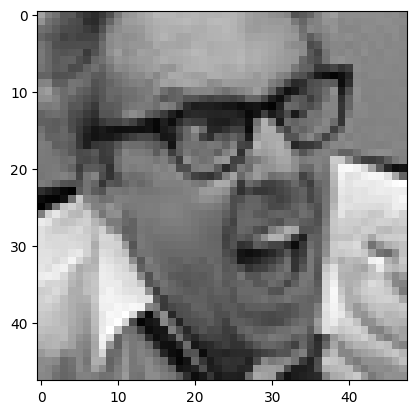

In [9]:
img_array = cv2.imread("Dataset/train/angry/Training_3908.jpg")
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# for _ in Classes:
#     path = os.path.join(Datadirectory, _)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img))
#         # backToRGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
#         plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
#         plt.show();
#         break
#     break

In [11]:
# img_size = 224
# new_array = cv2.resize(img_array, (img_size, img_size))
# plt.imshow(cv2.cvtColor(new_array,  cv2.COLOR_BGR2RGB))
# plt.show()

In [12]:
# new_array.shape

### Real all the image and convert them to array
   

In [13]:
# training_Data = []

# def create_training_Date():
#     for category in Classes:
#         path = os.path.join(Datadirectory, category)
#         class_num = Classes.index(category)
#         for img in os.listdir(path):
#             try:
#                 img_array = cv2.imread(os.path.join(path, img))
#                 new_array = cv2.resize(img_array, (img_size, img_size))
#                 training_Data.append([new_array, class_num])
#             except Exception as e:
#                 pass

In [14]:
# Function to load and preprocess images
def create_training_data():
    training_data = []
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing {os.path.join(path, img)}: {str(e)}")
    return training_data

In [15]:
training_Data = create_training_data()

In [16]:
print(len(training_Data))

9651


In [17]:
import random
random.shuffle(training_Data)

In [18]:
X = [] # data/feature
y = [] # label

for features, label in training_Data:
    X.append(features);
    y.append(label);

X = np.array(X).reshape(-1, img_size, img_size, 3) # Converted to 4D

In [19]:
# X.shape

### Normalize the data

In [20]:
X = X/255.0 # Normalizing it 

In [21]:
# y[0]

In [22]:
Y = np.array(y)

In [23]:
# Y.shape

## Deep learning Model for training - Transfer learning

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
# model = tf.keras.applications.MobileNetV2() ## Pretrained Model

In [26]:
# Deep learning Model for training - Transfer learning
model = tf.keras.applications.MobileNetV2(
    include_top=False, weights="imagenet", input_shape=(img_size, img_size, 3)
)
for layer in model.layers:
    layer.trainable = False

In [27]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### Transfer Learning - Tuning , weights will start from last check point

In [28]:
# base_input = model.layers[0].input
# base_output = model.layers[-2].output

In [29]:
# base_output

In [30]:
# final_output = layers.Dense(128)(base_output) ## New layer Added
# final_output = layers.Activation("relu")(final_output) ## activation layer
# final_output = layers.Dense(64)(final_output)
# final_output = layers.Activation("relu")(final_output)
# final_output = layers.Dense(7, activation = "softmax")(final_output) ## Classification layer

In [31]:
flatten_layer = layers.Flatten()(model.output)
final_output = layers.Dense(128, activation="relu")(flatten_layer)
final_output = layers.Dense(64, activation="relu")(final_output)
final_output = layers.Dense(7, activation="softmax")(final_output)

In [32]:
# final_output

In [33]:
# new_model = keras.Model(inputs = base_input, outputs = base_output)

In [34]:
new_model = tf.keras.models.Model(inputs=model.input, outputs=final_output)

In [35]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [36]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [37]:
# with tf.device("/GPU:0"):
#     new_model.fit(X, Y, epochs=10)

In [38]:
physical_devices = tf.config.list_physical_devices("GPU")
print("Available GPUs:", physical_devices)

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [39]:
effective_batch_size = 24  

# Example using a generator for training
def data_generator(X, Y, batch_size):
    num_samples = len(X)
    while True:
        indices = np.random.choice(num_samples, batch_size, replace=False)
        yield X[indices], Y[indices]


# Usage in fit
with tf.device("GPU"):
    new_model.fit(
        data_generator(X, Y, effective_batch_size),
        epochs=10,
        steps_per_epoch=len(X) // effective_batch_size,
    )

Epoch 1/10
402/402 [==============================] - 33s 64ms/step - loss: 2.1296 - accuracy: 0.5157
Epoch 2/10
402/402 [==============================] - 27s 68ms/step - loss: 0.8274 - accuracy: 0.7310
Epoch 3/10
402/402 [==============================] - 28s 69ms/step - loss: 0.5473 - accuracy: 0.8233
Epoch 4/10
402/402 [==============================] - 28s 68ms/step - loss: 0.3888 - accuracy: 0.8789
Epoch 5/10
402/402 [==============================] - 28s 70ms/step - loss: 0.2918 - accuracy: 0.9115
Epoch 6/10
402/402 [==============================] - 28s 70ms/step - loss: 0.2478 - accuracy: 0.9215
Epoch 7/10
402/402 [==============================] - 29s 71ms/step - loss: 0.1924 - accuracy: 0.9373
Epoch 8/10
402/402 [==============================] - 28s 70ms/step - loss: 0.2038 - accuracy: 0.9358
Epoch 9/10
402/402 [==============================] - 28s 70ms/step - loss: 0.2174 - accuracy: 0.9328
Epoch 10/10
402/402 [==============================] - 25s 63ms/step - loss: 0.192

In [40]:
new_model.save("Trained_model.h5")